In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ***Obtaining the data***

In [ ]:
#obtain the dataset
from tensorflow.keras.datasets import mnist

#getting data as numpy arrays
(x_train,y_train),(x_test,y_test) = mnist.load_data()

#each digit is originally represented as a 28x28 np object
x_train = x_train.reshape((60000,784)) #we reshape them as 1d 784 arrays

y = pd.DataFrame({'digit':y_train})
x = pd.DataFrame(x_train)

df = pd.concat([y,x],axis=1)


11490434/11490434 [==============================] - 0s 0us/step


# ***Quick look at the data (distribution and elements)***

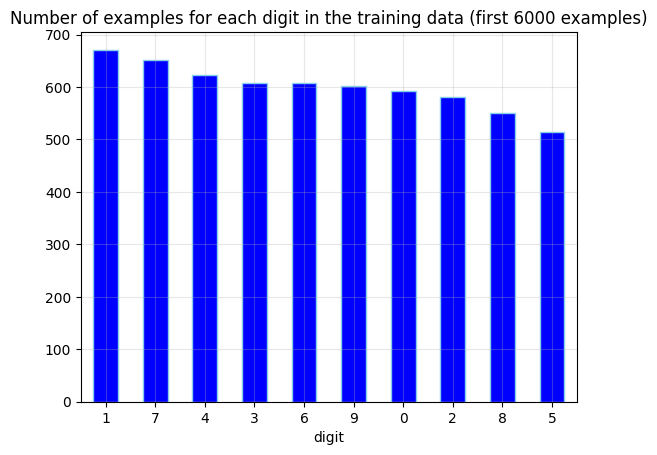

In [ ]:
#Plot the number of digits represented in the firt 6000 entries of the training data
df[:6000][:]['digit'].value_counts().plot(kind='bar', color='blue', edgecolor='skyblue')
plt.title('Number of examples for each digit in the training data (first 6000 examples)')
plt.grid(True,alpha=0.3)
plt.xticks(rotation=0)
plt.show()

In [ ]:
#The data seems to be relatively well balanced so we decide to keep the first 6000 examples
df_train = df[:6000][:]
print(df_train.shape)
df_train.head(5)

(6000, 785)


,digit,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#We now proceed to split the data
digits = df_train['digit'].values

df_train=df_train.drop(['digit'],axis=1)

data_matrix = df_train.values

print(data_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


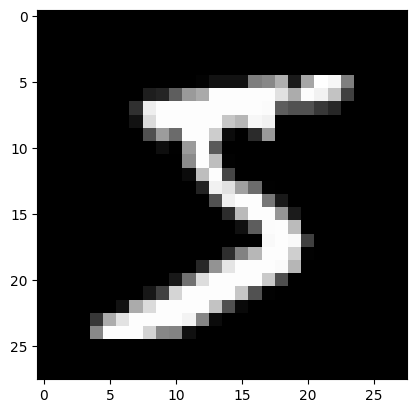

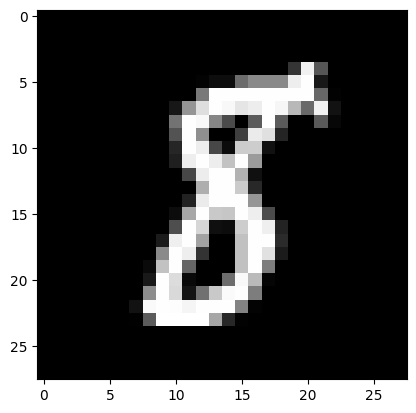

In [ ]:
#printing a few digits in the dataset
plt.imshow(data_matrix[0].reshape(28,28),cmap='gray')
plt.show()

plt.imshow(data_matrix[125].reshape(28,28),cmap='gray')
plt.show()

# ***Scaling the data***

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_matrix_scaled = scaler.fit_transform(data_matrix)

In [ ]:
print(data_matrix_scaled)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#We save the processed data into numpy objects to retrieve them in another notebook for the computations
np.save('data_matrix_scaled.npy', data_matrix_scaled)
np.save('digits.npy',digits)

# ***Test and validation data***

In [ ]:
df_validation = df[6001:7001][:]
df_test = df[7001:10001][:]

print(df_validation)
print(df_test)

      digit  0  1  2  3  4  5  6  7  8  ...  774  775  776  777  778  779  \
6001      0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
6002      1  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
6003      1  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
6004      5  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
6005      2  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
...     ... .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...   
6996      4  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
6997      5  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
6998      1  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
6999      9  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
7000      8  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   

      780  781  782  783  
6001    0    0    0    0  
6002    0    0    0  

In [ ]:
#We now proceed to split the data
digits_validation = df_validation['digit'].values
digits_test = df_test['digit'].values

df_validation = df_validation.drop(['digit'],axis=1)
df_test = df_test.drop(['digit'],axis=1)

test_data_matrix = df_test.values
validation_data_matrix = df_validation.values

print(test_data_matrix.shape)
print(validation_data_matrix.shape)

(3000, 784)
(1000, 784)


In [ ]:
test_data_matrix_scaled = scaler.fit_transform(test_data_matrix)
validation_data_matrix_scaled = scaler.fit_transform(validation_data_matrix)

In [ ]:
#Saving the data as numpy objects for use in the other notebooks

np.save('test_data_matrix_scaled.npy', test_data_matrix_scaled)
np.save('validation_data_matrix_scaled.npy',validation_data_matrix_scaled)

np.save('digits_test.npy',digits_test)
np.save('digits_validation.npy',digits_validation)